In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
dt = datasets.load_digits()

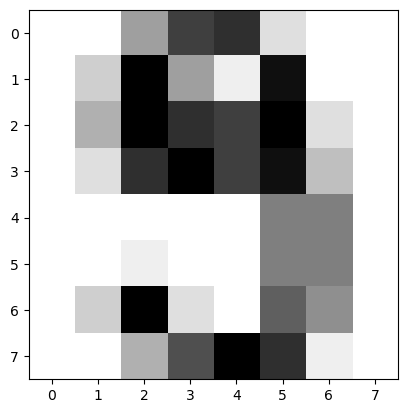

In [2]:
plt.imshow(dt.images[1020], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
     

In [4]:
from sklearn.model_selection import train_test_split
x = dt.data
y = dt.target
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state=42, stratify=y)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xTrain, yTrain)

print("Accuracy: {0}".format(knn.score(xTest, yTest)))

Accuracy: 0.9861111111111112


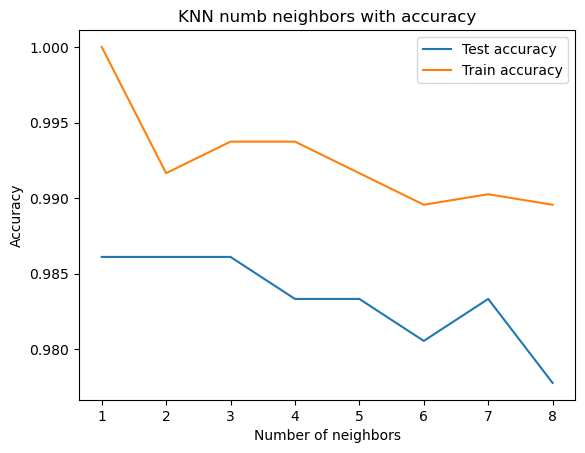

In [6]:
nb = np.arange(1,9)
train_acc = np.empty(len(nb))
test_acc = np.empty(len(nb))

for i, k in enumerate(nb):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(xTrain, yTrain)
  train_acc[i] = knn.score(xTrain, yTrain)
  test_acc[i] = knn.score(xTest, yTest)

plt.title('KNN numb neighbors with accuracy')
plt.plot(nb, test_acc, label='Test accuracy')
plt.plot(nb, train_acc, label='Train accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [14]:
from __future__ import print_function as pf 
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [16]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.', train=True, download=True)

100%|████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:11<00:00, 849075.07it/s]


Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw



100%|███████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 3000487.81it/s]


Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 1427615.38it/s]


Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw



In [18]:
print("Number of training examples", mnist.train_data.shape)
print("Image info", mnist[0])

Number of training examples torch.Size([60000, 28, 28])
Image info (<PIL.Image.Image image mode=L size=28x28 at 0x1F6E43AAE20>, 5)


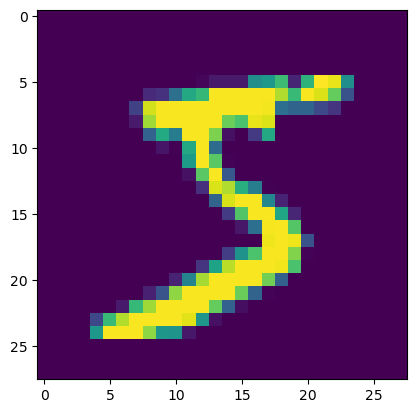

In [25]:
%matplotlib inline
plt.imshow(mnist[0][0])

In [20]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fully = nn.Sequential(nn.Linear(28*28, 10))

  def forward(self, x):
    x = x.view([-1, 28*28])
    x = self.fully(x)
    x = F.log_softmax(x, dim=1)
    return x

In [26]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train=True, transform=transforms.Compose([transforms.ToTensor()])), batch_size=64, shuffle=True)

In [27]:
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train=False, transform=transforms.Compose([transforms.ToTensor()])), batch_size=1, shuffle=True)

In [28]:
def train():
  learn_rate = 1e-3
  num_epochs = 3
  net = Net()
  optimizer = torch.optim.Adam(net.parameters(), lr=learn_rate)

  for ep in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
      out = net(data)
      loss = F.nll_loss(out, target)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch_idx % 100 == 0:
        print('Epoch = %f. Batch = %s Loss= %s' % (ep, batch_idx, loss.item()))
  return net

In [29]:
net = train()

Epoch = 0.000000. Batch = 0 Loss= 2.3248889446258545
Epoch = 0.000000. Batch = 100 Loss= 0.7397805452346802
Epoch = 0.000000. Batch = 200 Loss= 0.6075253486633301
Epoch = 0.000000. Batch = 300 Loss= 0.5092110633850098
Epoch = 0.000000. Batch = 400 Loss= 0.4216160774230957
Epoch = 0.000000. Batch = 500 Loss= 0.353423535823822
Epoch = 0.000000. Batch = 600 Loss= 0.46066856384277344
Epoch = 0.000000. Batch = 700 Loss= 0.4484890103340149
Epoch = 0.000000. Batch = 800 Loss= 0.3619826138019562
Epoch = 0.000000. Batch = 900 Loss= 0.34377139806747437
Epoch = 1.000000. Batch = 0 Loss= 0.2747149169445038
Epoch = 1.000000. Batch = 100 Loss= 0.4039647579193115
Epoch = 1.000000. Batch = 200 Loss= 0.27614668011665344
Epoch = 1.000000. Batch = 300 Loss= 0.3124730587005615
Epoch = 1.000000. Batch = 400 Loss= 0.26446571946144104
Epoch = 1.000000. Batch = 500 Loss= 0.2618008553981781
Epoch = 1.000000. Batch = 600 Loss= 0.5364180207252502
Epoch = 1.000000. Batch = 700 Loss= 0.3218778073787689
Epoch = 1.0

In [30]:
net.eval()
test_loss = 0
correct = 0
total = 0
for data, target in test_loader:
  total += len(target)
  out = net(data)
  pred = out.max(1, keepdim=True)[1]
  correct += target.eq(pred.view_as(target)).sum()

print("Correct = %s" % total, correct.item())
print("Accuracy ", correct.item()*100/10000.)
     

Correct = 10000 9192
Accuracy  91.92


In [31]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('gapminder.csv')

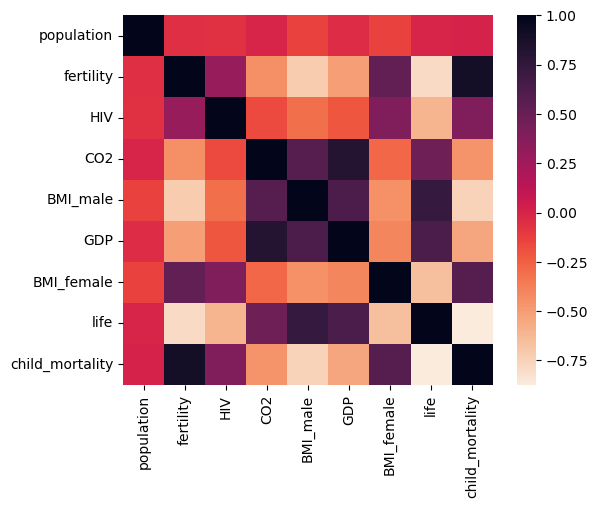

In [32]:
ax = sns.heatmap(df.corr(), square=True, cmap='rocket_r')
plt.show()

accuracy 0.6162438752151917


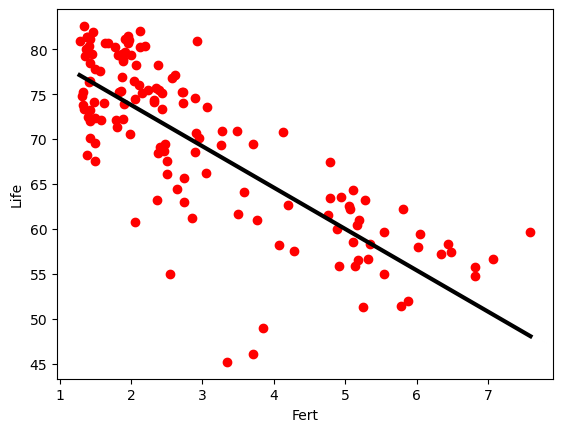

In [33]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

xFert = df['fertility'].values.reshape(-1,1)
yLife = df['life'].values.reshape(-1,1)
pred_space = np.linspace(min(xFert), max(xFert)).reshape(-1,1)

xTrain, xTest, yTrain, yTest = train_test_split(xFert, yLife, test_size=0.3, random_state=42)

reg = LinearRegression()

reg.fit(xTrain, yTrain)
yPredict = reg.predict(pred_space)

print("accuracy", reg.score(xFert, yLife))

plt.scatter(xFert, yLife, color='red')
plt.plot(pred_space, yPredict, color='black', linewidth=3)
plt.ylabel('Life')
plt.xlabel('Fert')
plt.show()

In [34]:
fts = df.copy()
del fts['life']
del fts['Region']
yLife = df['life'].values.reshape(-1,1)

xTrain, xTest, yTrain, yTest = train_test_split(fts, yLife, test_size=0.3, random_state=42)

In [35]:
reg_all = LinearRegression()
reg_all.fit(xTrain, yTrain)
print('Accuracy', reg_all.score(fts, yLife))

Accuracy 0.8914651485793206


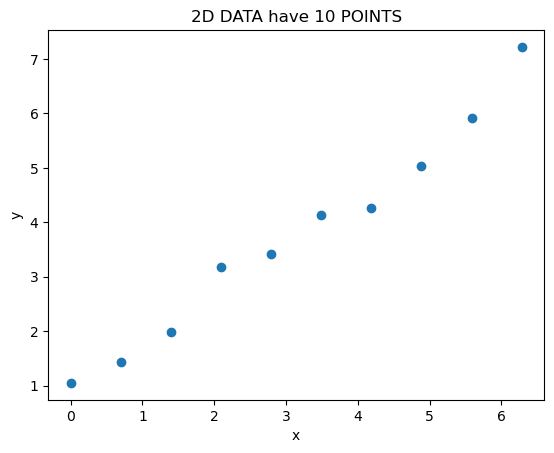

In [47]:
n = 10
m = .9
c = 1
x = np.linspace(0,2*np.pi, n)
y = m*x + c + np.random.normal(0, .3, x.shape)
plt.figure()
plt.plot(x,y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D DATA have 10 POINTS')
plt.show()

In [48]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __len__(self):
    return len(self.x)
    
  def __getitem__(self, idx):
    sample = {
        'feature': torch.tensor([1, self.x[idx]]),
        'label': torch.tensor([self.y[idx]])
    }
    return sample

In [49]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
  samp = dataset[i]
  print(i, samp['feature'], samp['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([1.0481], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([1.4303], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([1.9838], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([3.1754], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.4108], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([4.1268], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.2531], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([5.0346], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([5.9102], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([7.2209], dtype=torch.float64)


In [50]:
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers = 4)

In [13]:
# IV. Exercises
    # 1. Classification
    
from scipy.spatial.distance import cosine
import sklearn.metrics as metrics
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation, cosine
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error

In [15]:
# load dataset into variable M
import numpy as np
import pandas as pd
M = np.array([[4, 3, 2, 3],
            [1, 2, 3, 1],
            [np.nan, 2, 1, np.nan],
            [4, 3, np.nan, np.nan]])
pd.DataFrame(M)

,0,1,2,3
0,4.0,3.0,2.0,3.0
1,1.0,2.0,3.0,1.0
2,NaN,2.0,1.0,NaN
3,4.0,3.0,NaN,NaN


In [52]:
# Compute similarities

import math
def cosine_similarity(v1,v2, metric='cosine'):
    #metric: cosine or correlation
    if metric == 'correlation':
        v1 = v1 - np.nanmean(v1)
        v2 = v2 - np.nanmean(v2)
    "compute similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        if np.isnan(x) or np.isnan(y): continue
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

def sim_matrix(M, dimension='user', metric='cosine'):
    N = M.shape[0] if dimension == 'user' else M.shape[1]
    sim = np.zeros([N,N])
    for i in range(N):
        for j in range(N):
            if i == j:
                sim[i,j] = 0 #Cancel out the effect of self-similarity in the sums later
                continue
            if dimension == 'user':
                v1, v2 = M[i,:], M[j,:]
            else:
                v1, v2 = M[:,i], M[:,j]
            sim[i][j] = cosine_similarity(v1,v2,metric)
    return sim

In [53]:
cosine_similarity(M[0,:], M[2,:], 'cosine')

0.9922778767136677

In [54]:
sim_matrix(M, 'user')

array([[0.        , 0.79582243, 0.99227788, 1.        ],
       [0.79582243, 0.        , 0.86824314, 0.89442719],
       [0.99227788, 0.86824314, 0.        , 1.        ],
       [1.        , 0.89442719, 1.        , 0.        ]])

In [55]:
sim_matrix(M, 'item')

array([[0.        , 0.9649505 , 0.73994007, 0.99705449],
       [0.9649505 , 0.        , 0.90748521, 0.96476382],
       [0.73994007, 0.90748521, 0.        , 0.78935222],
       [0.99705449, 0.96476382, 0.78935222, 0.        ]])

In [56]:
cosine_similarity(M[0,:], M[2,:], 'correlation')

0.7071067811865475

In [57]:
sim_matrix(M, 'user', 'correlation')

array([[ 0.        , -0.85280287,  0.70710678,  0.70710678],
       [-0.85280287,  0.        , -0.5547002 , -0.89442719],
       [ 0.70710678, -0.5547002 ,  0.        , -1.        ],
       [ 0.70710678, -0.89442719, -1.        ,  0.        ]])

In [58]:
sim_matrix(M, 'item', 'correlation')

array([[ 0.        ,  0.94280904, -0.89442719,  0.9486833 ],
       [ 0.94280904,  0.        ,  0.        ,  1.        ],
       [-0.89442719,  0.        ,  0.        , -0.70710678],
       [ 0.9486833 ,  1.        , -0.70710678,  0.        ]])

In [60]:
def user_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=1)
    sim_users = sim_matrix(M, 'user', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = 
    return pred

SyntaxError: invalid syntax (1815969332.py, line 9)

In [61]:
print("User-based CF (Cosine): \n" + str(pd.DataFrame(user_cf(M, 'cosine'))))
print("User-based CF (Pearson): \n" + str(pd.DataFrame(user_cf(M, 'correlation'))))

NameError: name 'user_cf' is not defined